In [3]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.6 MB/s eta 0:00:00


In [1]:
!pip install numpy scipy matplotlib

Generation 0: Best Distance = 24392.763370742752
Generation 10: Best Distance = 19787.208917066593
Generation 20: Best Distance = 18402.23286132438
Generation 30: Best Distance = 16225.106010244352
Generation 40: Best Distance = 15061.615010809512
Generation 50: Best Distance = 14146.60827531306
Generation 60: Best Distance = 12930.574410097433
Generation 70: Best Distance = 12023.210803748148
Generation 80: Best Distance = 11400.708721660687
Generation 90: Best Distance = 11196.339298044526
Generation 100: Best Distance = 11132.433982020972
Generation 110: Best Distance = 10857.091999072642
Generation 120: Best Distance = 10740.71896597064
Generation 130: Best Distance = 10469.326749834085
Generation 140: Best Distance = 10469.326749834085
Generation 150: Best Distance = 10414.821384322571
Generation 160: Best Distance = 10316.357387496993
Generation 170: Best Distance = 10236.75953850143
Generation 180: Best Distance = 10210.532437242588
Generation 190: Best Distance = 10132.81756931

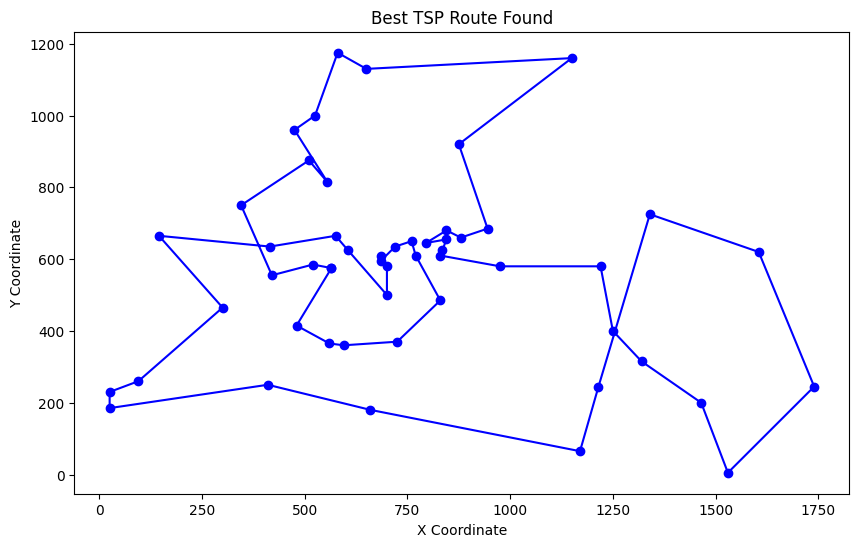

In [2]:
import numpy as np
import random
import gzip
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# 1. Load the Berlin52 Dataset
coordinates = []
with gzip.open('/content/sample_data/berlin52.tsp.gz', 'rt') as file:
    data_section = False
    for line in file:
        line = line.strip()
        if line == 'NODE_COORD_SECTION':
            data_section = True
            continue
        if line == 'EOF':
            break
        if data_section:
            parts = line.strip().split()
            if len(parts) >= 3:
                _, x, y = parts[:3]
                coordinates.append((float(x), float(y)))

coordinates = np.array(coordinates)

# 2. Calculate the Distance Matrix
distance_matrix = cdist(coordinates, coordinates, metric='euclidean')

# 3. Initialize the Population
def create_route():
    route = list(range(len(coordinates)))
    random.shuffle(route)
    return route

def initial_population(pop_size):
    return [create_route() for _ in range(pop_size)]

# 4. Define the Fitness Function
def route_distance(route):
    return sum(
        distance_matrix[route[i], route[(i + 1) % len(route)]]
        for i in range(len(route))
    )

def fitness(route):
    return 1 / route_distance(route)

# 5. Selection
def selection(population, fitness_scores, num_parents):
    fitness_sum = np.sum(fitness_scores)
    selection_probs = fitness_scores / fitness_sum
    selected_indices = np.random.choice(
        len(population),
        size=num_parents,
        replace=False,
        p=selection_probs
    )
    selected = [population[i] for i in selected_indices]
    return selected

# 6. Crossover (Breeding)
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None]*size
    child[start:end] = parent1[start:end]
    ptr = end
    for gene in parent2:
        if gene not in child:
            if ptr >= size:
                ptr = 0
            child[ptr] = gene
            ptr += 1
    return child

# 7. Mutation
def mutate(route, mutation_rate=0.01):
    for swapped in range(len(route)):
        if random.random() < mutation_rate:
            swap_with = int(random.random() * len(route))
            route[swapped], route[swap_with] = route[swap_with], route[swapped]
    return route

# 8. Create New Generation
def new_generation(population, fitness_scores, elite_size, mutation_rate):
    new_pop = []
    sorted_indices = np.argsort(fitness_scores)[::-1]
    sorted_population = [population[i] for i in sorted_indices]
    new_pop.extend(sorted_population[:elite_size])  # Elitism

    num_offspring = len(population) - elite_size
    for _ in range(num_offspring):
        parents = random.sample(sorted_population[:len(population)//2], 2)
        child = crossover(parents[0], parents[1])
        child = mutate(child, mutation_rate)
        new_pop.append(child)
    return new_pop

# 9. Run the Genetic Algorithm
def genetic_algorithm(pop_size, elite_size, mutation_rate, generations):
    population = initial_population(pop_size)
    for i in range(generations):
        fitness_scores = np.array([fitness(route) for route in population])
        population = new_generation(population, fitness_scores, elite_size, mutation_rate)
        if i % 10 == 0:
            best_distance = 1 / max(fitness_scores)
            print(f'Generation {i}: Best Distance = {best_distance}')
    # Final fitness evaluation
    fitness_scores = np.array([fitness(route) for route in population])
    best_route_index = np.argmax(fitness_scores)
    best_route = population[best_route_index]
    print(f'Final Best Distance: {1 / fitness_scores[best_route_index]}')
    return best_route

# 10. Visualize the Best Route
def plot_route(route):
    route_coords = coordinates[route + [route[0]]]
    plt.figure(figsize=(10, 6))
    plt.plot(route_coords[:, 0], route_coords[:, 1], 'o-', color='blue')
    plt.title('Best TSP Route Found')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# 11. Execute the Algorithm
best_route = genetic_algorithm(
    pop_size=100,
    elite_size=20,
    mutation_rate=0.01,
    generations=500
)
plot_route(best_route)


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation = 1
Best Fitness (Distance) = 19431.881864849835
Generation = 2
Best Fitness (Distance) = 19431.881864849835
Generation = 3
Best Fitness (Distance) = 19431.881864849835
Generation = 4
Best Fitness (Distance) = 18958.167547476543
Generation = 5
Best Fitness (Distance) = 18958.167547476543
Generation = 6
Best Fitness (Distance) = 18958.167547476543
Generation = 7
Best Fitness (Distance) = 18958.167547476543
Generation = 8
Best Fitness (Distance) = 17643.191150448474
Generation = 9
Best Fitness (Distance) = 17436.277560501465
Generation = 10
Best Fitness (Distance) = 15273.100279743941
Generation = 11
Best Fitness (Distance) = 15273.100279743941
Generation = 12
Best Fitness (Distance) = 15273.100279743941
Generation = 13
Best Fitness (Distance) = 15273.100279743941
Generation = 14
Best Fitness (Distance) = 15273.100279743941
Generation = 15
Best Fitness (Distance) = 15273.100279743941
Generation = 16
Best Fitness (Distance) = 14616.406474880572
Generation = 17
Best Fitness (Dis

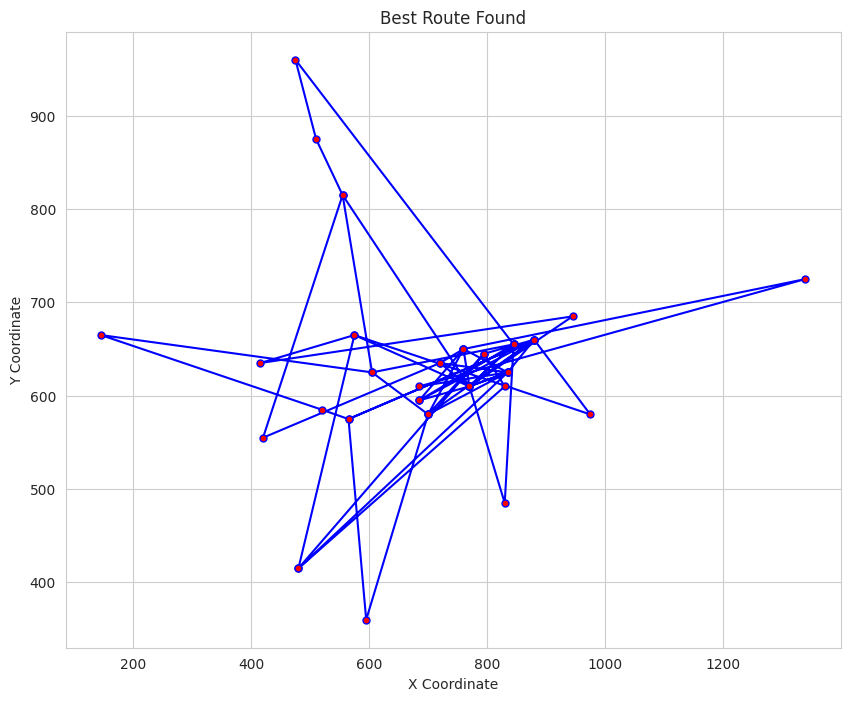

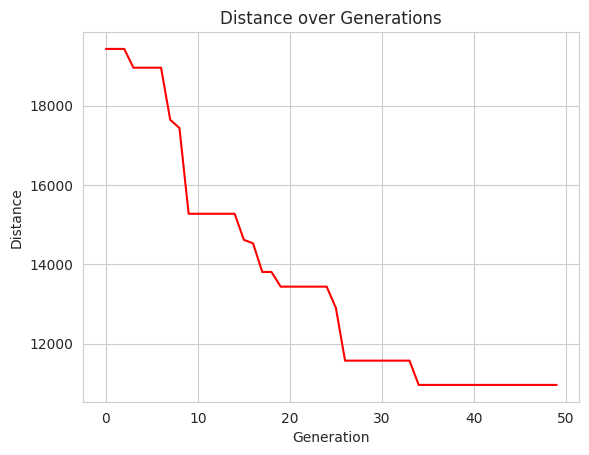

In [9]:
import numpy
import pygad
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Load TSP problem data manually from /content/berlin52.tsp.gz
import gzip

tsplib_file_path = '/content/sample_data/berlin52.tsp.gz'

nodes = []
distance_matrix = {}

with gzip.open(tsplib_file_path, 'rt') as tsp_file:
    lines = tsp_file.readlines()
    node_section = False
    for line in lines:
        line = line.strip()
        if line == 'NODE_COORD_SECTION':
            node_section = True
            continue
        if line == 'EOF':
            break
        if node_section:
            parts = line.split()
            node_id = int(parts[0]) - 1  # TSPLIB nodes are 1-indexed
            x, y = float(parts[1]), float(parts[2])
            nodes.append((node_id, x, y))

# Calculate distances between nodes
def calculate_distance_matrix(nodes):
    matrix = {}
    for i, (_, x1, y1) in enumerate(nodes):
        matrix[i] = {}
        for j, (_, x2, y2) in enumerate(nodes):
            if i != j:
                matrix[i][j] = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return matrix

distance_matrix = calculate_distance_matrix(nodes)

def calculate_distance(solution):
    total_distance = 0
    for i in range(len(solution) - 1):
        total_distance += distance_matrix[int(solution[i])][int(solution[i + 1])]
    # Add distance from last node to first to complete the cycle
    total_distance += distance_matrix[int(solution[-1])][int(solution[0])]
    return total_distance

# Genetic Algorithm constants:
POPULATION_SIZE = 50
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Fitness function
def fitness_function(ga_instance, solution, solution_idx):
    try:
        total_distance = calculate_distance(solution)
        # Since we are minimizing distance, return negative of distance as fitness
        return -total_distance
    except KeyError:
        # Handle invalid solutions that reference non-existent nodes
        return float('-inf')

# Parameters for PyGAD
gene_space = [i for i in range(len(nodes))]

# Creating the initial population
num_genes = len(nodes)

# PyGAD callback to track the best solution after each generation
fitness_history = []

def on_generation(ga_instance):
    best_solution, best_solution_fitness, _ = ga_instance.best_solution()
    fitness_history.append(-best_solution_fitness)  # Use negative to show distance
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Best Fitness (Distance) = {-best_solution_fitness}")

# Running the Genetic Algorithm using PyGAD
ga_instance = pygad.GA(
    num_generations=MAX_GENERATIONS,
    num_parents_mating=int(POPULATION_SIZE * P_CROSSOVER),
    fitness_func=fitness_function,
    sol_per_pop=POPULATION_SIZE,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="tournament",
    K_tournament=3,
    keep_parents=1,
    crossover_type="two_points",
    mutation_type="random",
    mutation_probability=P_MUTATION,
    on_generation=on_generation,
    random_seed=RANDOM_SEED
)

ga_instance.run()

# After the run, print the best solution
best_solution, best_solution_fitness, _ = ga_instance.best_solution()
print("-- Best Ever Route = ", best_solution)
print("-- Best Ever Distance = ", -best_solution_fitness)

# Plotting the best route
def plot_route(nodes, solution):
    plt.figure(figsize=(10, 8))
    x_coords = [nodes[int(i)][1] for i in solution] + [nodes[int(solution[0])][1]]
    y_coords = [nodes[int(i)][2] for i in solution] + [nodes[int(solution[0])][2]]
    plt.plot(x_coords, y_coords, 'b-', marker='o', markerfacecolor='red', markersize=5)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Best Route Found')
    plt.show()

plot_route(nodes, best_solution)

# Plotting the fitness evolution
sns.set_style("whitegrid")
plt.plot(fitness_history, color='red')
plt.xlabel('Generation')
plt.ylabel('Distance')
plt.title('Distance over Generations')
plt.show()

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation = 1
Best Fitness (Distance) = 24588.30838804948
Generation = 2
Best Fitness (Distance) = 22975.869674541613
Generation = 3
Best Fitness (Distance) = 22975.869674541613
Generation = 4
Best Fitness (Distance) = 22975.869674541613
Generation = 5
Best Fitness (Distance) = 22035.725237971736
Generation = 6
Best Fitness (Distance) = 21900.810914532398
Generation = 7
Best Fitness (Distance) = 21900.810914532398
Generation = 8
Best Fitness (Distance) = 20984.063210041488
Generation = 9
Best Fitness (Distance) = 20984.063210041488
Generation = 10
Best Fitness (Distance) = 20984.063210041488
Generation = 11
Best Fitness (Distance) = 20984.063210041488
Generation = 12
Best Fitness (Distance) = 20153.558917121798
Generation = 13
Best Fitness (Distance) = 20153.558917121798
Generation = 14
Best Fitness (Distance) = 18950.60554112996
Generation = 15
Best Fitness (Distance) = 18950.60554112996
Generation = 16
Best Fitness (Distance) = 18950.60554112996
Generation = 17
Best Fitness (Distanc

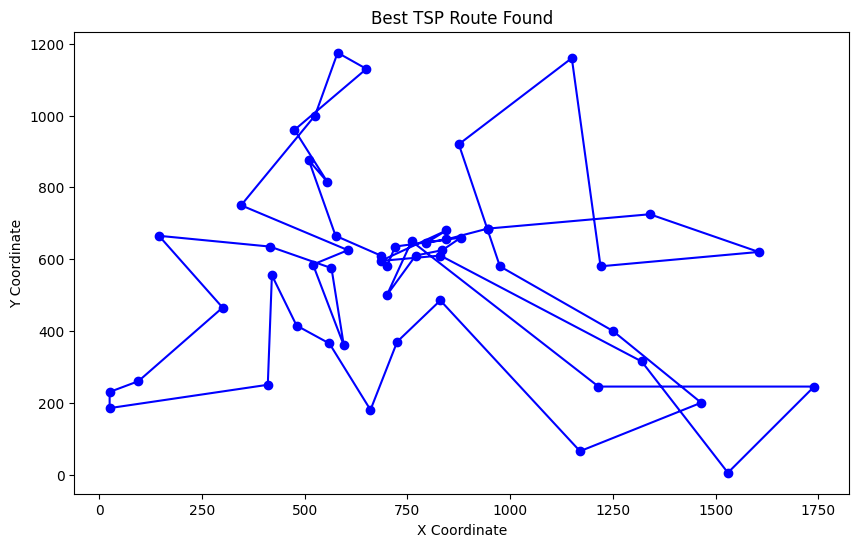

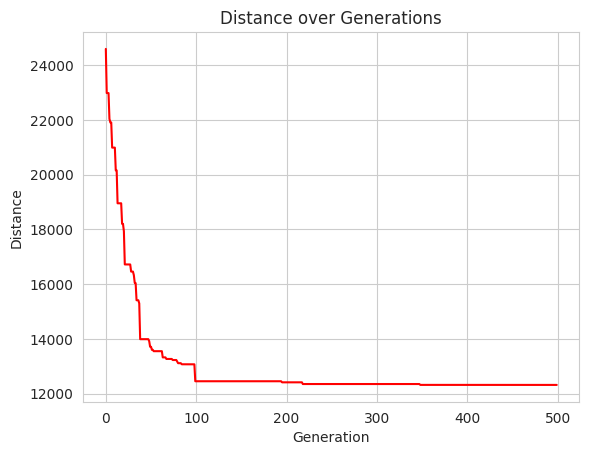

In [7]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
import random
import pygad
from scipy.spatial.distance import cdist

# 1. Load the Berlin52 Dataset
coordinates = []
with gzip.open('/content/sample_data/berlin52.tsp.gz', 'rt') as file:
    data_section = False
    for line in file:
        line = line.strip()
        if line == 'NODE_COORD_SECTION':
            data_section = True
            continue
        if line == 'EOF':
            break
        if data_section:
            parts = line.strip().split()
            if len(parts) >= 3:
                _, x, y = parts[:3]
                coordinates.append((float(x), float(y)))

coordinates = np.array(coordinates)

# 2. Calculate the Distance Matrix
distance_matrix = cdist(coordinates, coordinates, metric='euclidean')

# 3. Set Random Seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# 4. Define Fitness Function
def fitness_func(ga_instance, solution, solution_idx):
    total_distance = sum(
        distance_matrix[int(solution[i % len(solution)]), int(solution[(i + 1) % len(solution)])]
        for i in range(len(solution))
    )
    return -total_distance

# 5. GA Parameters
POPULATION_SIZE = 200
P_CROSSOVER = 0.95
P_MUTATION = 0.2
MAX_GENERATIONS = 500

# 6. Gene Space
num_genes = len(coordinates)
gene_space = [i for i in range(num_genes)]

# 7. Fitness History Tracking
fitness_history = []

def on_generation(ga_instance):
    best_solution, best_solution_fitness, _ = ga_instance.best_solution()
    fitness_history.append(-best_solution_fitness)
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Best Fitness (Distance) = {-best_solution_fitness}")

# 8. Initialize GA Instance
ga_instance = pygad.GA(
    num_generations=MAX_GENERATIONS,
    num_parents_mating=int(POPULATION_SIZE * P_CROSSOVER),
    fitness_func=fitness_func,
    sol_per_pop=POPULATION_SIZE,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="tournament",
    K_tournament=5,
    keep_parents=2,
    crossover_type="two_points",
    mutation_type="swap",
    mutation_probability=P_MUTATION,
    on_generation=on_generation,
    random_seed=RANDOM_SEED,
    allow_duplicate_genes=False  # Ensures valid permutations
)

# 9. Run the GA
ga_instance.run()

# 10. Retrieve and Display Results
best_solution, best_solution_fitness, _ = ga_instance.best_solution()
print("-- Best Ever Route = ", best_solution)
print("-- Best Ever Distance = ", -best_solution_fitness)

# 11. Visualize the Best Route
def plot_route(coordinates, solution):
    route_coords = coordinates[[int(gene) for gene in solution.tolist() + [solution[0]]]]
    plt.figure(figsize=(10, 6))
    plt.plot(route_coords[:, 0], route_coords[:, 1], 'o-', color='blue')
    plt.title('Best TSP Route Found')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

plot_route(coordinates, best_solution)

# 12. Plot Fitness Evolution
import seaborn as sns
sns.set_style("whitegrid")
plt.plot(fitness_history, color='red')
plt.xlabel('Generation')
plt.ylabel('Distance')
plt.title('Distance over Generations')
plt.show()


Generation = 1
Best Fitness (Distance) = 21872.58724900244
Generation = 2
Best Fitness (Distance) = 18413.06506952995
Generation = 3
Best Fitness (Distance) = 15985.530752870014
Generation = 4
Best Fitness (Distance) = 14232.569653073917
Generation = 5
Best Fitness (Distance) = 12991.671410296189
Generation = 6
Best Fitness (Distance) = 12886.216187009606
Generation = 7
Best Fitness (Distance) = 11120.251380699483
Generation = 8
Best Fitness (Distance) = 9977.04004743958
Generation = 9
Best Fitness (Distance) = 9740.915207497614
Generation = 10
Best Fitness (Distance) = 9265.105291317512
Generation = 11
Best Fitness (Distance) = 8931.63443133581
Generation = 12
Best Fitness (Distance) = 7547.533586795446
Generation = 13
Best Fitness (Distance) = 7547.533586795446
Generation = 14
Best Fitness (Distance) = 7309.981595090477
Generation = 15
Best Fitness (Distance) = 6761.111447288017
Generation = 16
Best Fitness (Distance) = 6432.7591635961635
Generation = 17
Best Fitness (Distance) = 642

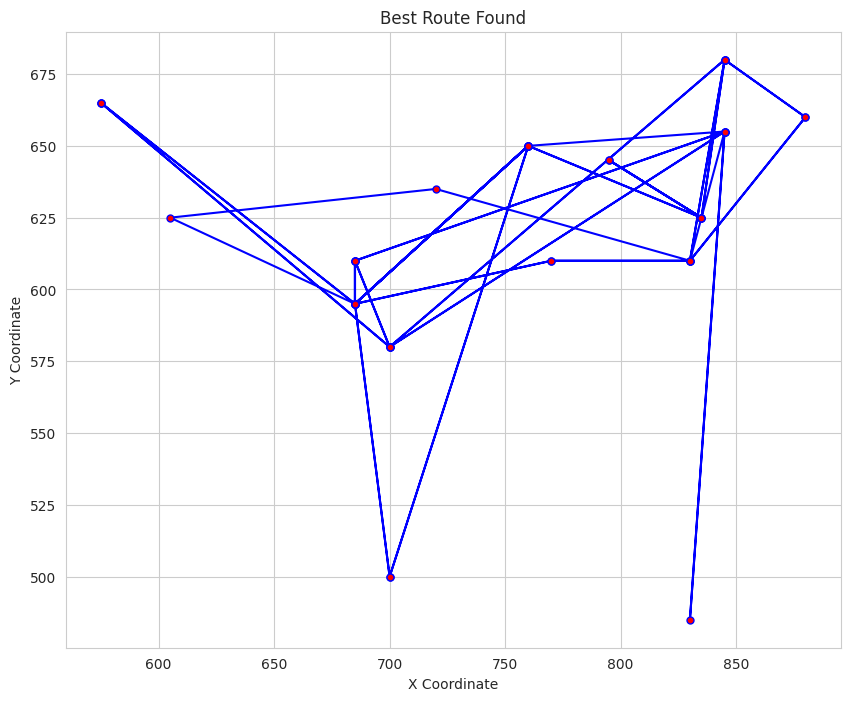

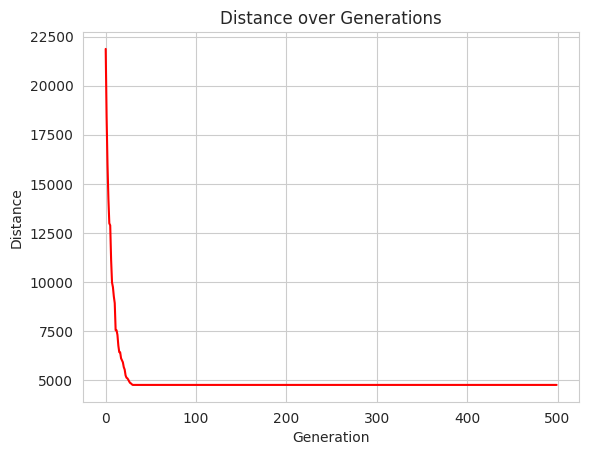

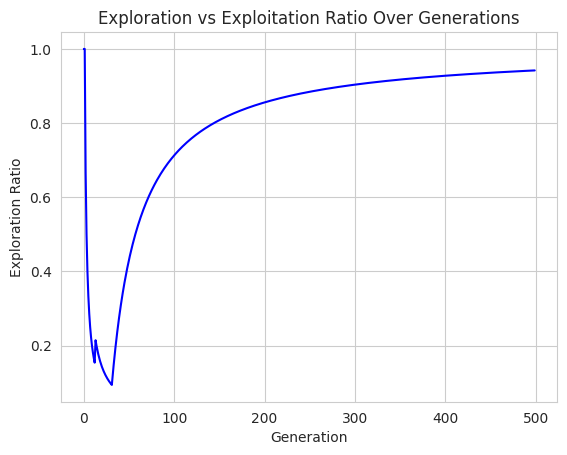

In [11]:
import numpy
import pygad
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Load TSP problem data manually from /content/berlin52.tsp.gz
import gzip

tsplib_file_path = '/content/sample_data/berlin52.tsp.gz'

nodes = []
distance_matrix = {}

with gzip.open(tsplib_file_path, 'rt') as tsp_file:
    lines = tsp_file.readlines()
    node_section = False
    for line in lines:
        line = line.strip()
        if line == 'NODE_COORD_SECTION':
            node_section = True
            continue
        if line == 'EOF':
            break
        if node_section:
            parts = line.split()
            node_id = int(parts[0]) - 1  # TSPLIB nodes are 1-indexed
            x, y = float(parts[1]), float(parts[2])
            nodes.append((node_id, x, y))

# Calculate distances between nodes
def calculate_distance_matrix(nodes):
    matrix = {}
    for i, (_, x1, y1) in enumerate(nodes):
        matrix[i] = {}
        for j, (_, x2, y2) in enumerate(nodes):
            if i != j:
                matrix[i][j] = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return matrix

distance_matrix = calculate_distance_matrix(nodes)

def calculate_distance(solution):
    total_distance = 0
    for i in range(len(solution) - 1):
        total_distance += distance_matrix[int(solution[i])][int(solution[i + 1])]
    # Add distance from last node to first to complete the cycle
    total_distance += distance_matrix[int(solution[-1])][int(solution[0])]
    return total_distance

# Genetic Algorithm constants:
POPULATION_SIZE = 200
P_CROSSOVER = 0.95  # probability for crossover
P_MUTATION = 0.2   # probability for mutating an individual
MAX_GENERATIONS = 500
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Fitness function
def fitness_function(ga_instance, solution, solution_idx):
    try:
        total_distance = calculate_distance(solution)
        # Since we are minimizing distance, return negative of distance as fitness
        return -total_distance
    except KeyError:
        # Handle invalid solutions that reference non-existent nodes
        return float('-inf')

# Parameters for PyGAD
gene_space = [i for i in range(len(nodes))]

# Creating the initial population
num_genes = len(nodes)

# PyGAD callback to track the best solution after each generation
fitness_history = []
exploration_exploitation_ratio = []

# Exploration vs Exploitation tracking variables
exploration_threshold = 0.5  # Threshold to switch from exploration to exploitation
exploration_phase = True
exploration_count = 0
exploitation_count = 0

# Modify the on_generation callback to track exploration vs exploitation
def on_generation(ga_instance):
    global exploration_phase, exploration_count, exploitation_count
    best_solution, best_solution_fitness, _ = ga_instance.best_solution()
    fitness_history.append(-best_solution_fitness)  # Use negative to show distance
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Best Fitness (Distance) = {-best_solution_fitness}")

    # Track exploration vs exploitation
    if exploration_phase:
        exploration_count += 1
    else:
        exploitation_count += 1

    # Switch between exploration and exploitation based on fitness improvements
    if len(fitness_history) > 1:
        if fitness_history[-1] < fitness_history[-2]:
            exploration_phase = False  # Switch to exploitation if there is an improvement
        else:
            exploration_phase = True  # Continue exploring if no improvement

    # Record the current ratio
    total_actions = exploration_count + exploitation_count
    if total_actions > 0:
        exploration_exploitation_ratio.append(exploration_count / total_actions)

# Running the Genetic Algorithm using PyGAD
ga_instance = pygad.GA(
    num_generations=MAX_GENERATIONS,
    num_parents_mating=int(POPULATION_SIZE * P_CROSSOVER),
    fitness_func=fitness_function,
    sol_per_pop=POPULATION_SIZE,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="tournament",
    K_tournament=5,
    keep_parents=2,
    crossover_type="two_points",
    mutation_type="swap",
    mutation_probability=P_MUTATION,
    on_generation=on_generation,
    random_seed=RANDOM_SEED
)

ga_instance.run()

# After the run, print the best solution
best_solution, best_solution_fitness, _ = ga_instance.best_solution()
print("-- Best Ever Route = ", best_solution)
print("-- Best Ever Distance = ", -best_solution_fitness)

# Plotting the best route
def plot_route(nodes, solution):
    plt.figure(figsize=(10, 8))
    x_coords = [nodes[int(i)][1] for i in solution] + [nodes[int(solution[0])][1]]
    y_coords = [nodes[int(i)][2] for i in solution] + [nodes[int(solution[0])][2]]
    plt.plot(x_coords, y_coords, 'b-', marker='o', markerfacecolor='red', markersize=5)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Best Route Found')
    plt.show()

plot_route(nodes, best_solution)

# Plotting the fitness evolution
sns.set_style("whitegrid")
plt.plot(fitness_history, color='red')
plt.xlabel('Generation')
plt.ylabel('Distance')
plt.title('Distance over Generations')
plt.show()

# Plotting the Exploration vs Exploitation ratio
total_generations = len(exploration_exploitation_ratio)
plt.plot(range(total_generations), exploration_exploitation_ratio, color='blue')
plt.xlabel('Generation')
plt.ylabel('Exploration Ratio')
plt.title('Exploration vs Exploitation Ratio Over Generations')
plt.show()

Best Fitness (1/Total Distance): 0.0001068616436163379
Best Distance: 9357.894621107172


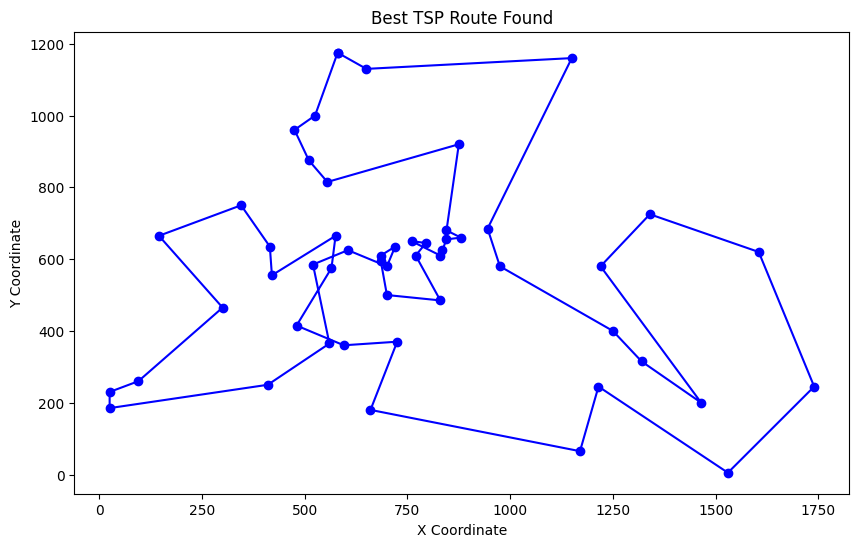

In [5]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
import random
import pygad
from scipy.spatial.distance import cdist

# 1. Load the Berlin52 Dataset
coordinates = []
with gzip.open('/content/sample_data/berlin52.tsp.gz', 'rt') as file:
    data_section = False
    for line in file:
        line = line.strip()
        if line == 'NODE_COORD_SECTION':
            data_section = True
            continue
        if line == 'EOF':
            break
        if data_section:
            parts = line.strip().split()
            if len(parts) >= 3:
                _, x, y = parts[:3]
                coordinates.append((float(x), float(y)))

coordinates = np.array(coordinates)

# 2. Calculate the Distance Matrix
distance_matrix = cdist(coordinates, coordinates, metric='euclidean')

# 3. Define the Fitness Function
def fitness_func(ga_instance, solution, solution_idx):
    route = solution
    total_distance = sum(
        distance_matrix[route[i % len(route)], route[(i + 1) % len(route)]]
        for i in range(len(route))
    )
    fitness = 1.0 / total_distance
    return fitness

# 4. Define Custom Crossover Function
def crossover_func(parents, offspring_size, ga_instance):
    offspring = []
    for k in range(offspring_size[0]):
        # Select parents
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        parent1 = parents[parent1_idx, :].copy()
        parent2 = parents[parent2_idx, :].copy()

        # Apply Order Crossover (OX)
        size = len(parent1)
        start, end = sorted(random.sample(range(size), 2))
        child = [None]*size
        child[start:end] = parent1[start:end]
        ptr = end
        for gene in parent2:
            if gene not in child:
                if ptr >= size:
                    ptr = 0
                child[ptr] = gene
                ptr += 1
        offspring.append(child)
    return np.array(offspring)

# 5. Define Custom Mutation Function
def mutation_func(offspring, ga_instance):
    for idx in range(offspring.shape[0]):
        if random.random() < ga_instance.mutation_probability:
            swap_indices = random.sample(range(offspring.shape[1]), 2)
            # Swap two cities
            offspring[idx, swap_indices[0]], offspring[idx, swap_indices[1]] = \
            offspring[idx, swap_indices[1]], offspring[idx, swap_indices[0]]
    return offspring

# 6. Generate Initial Population
def create_initial_population(sol_per_pop, num_genes):
    initial_population = []
    for _ in range(sol_per_pop):
        individual = list(range(num_genes))
        random.shuffle(individual)
        initial_population.append(individual)
    return np.array(initial_population)

num_genes = len(coordinates)
sol_per_pop = 100
initial_population = create_initial_population(sol_per_pop, num_genes)

# 7. Set up GA Instance
ga_instance = pygad.GA(
    num_generations=500,
    num_parents_mating=20,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    initial_population=initial_population,
    parent_selection_type="sss",
    keep_elitism=2,
    crossover_type=crossover_func,
    mutation_type=mutation_func,
    mutation_probability=0.01,
    gene_type=int,
    suppress_warnings=True
)

# 8. Run the GA
ga_instance.run()

# 9. Retrieve the Best Solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Best Fitness (1/Total Distance): {solution_fitness}")
best_distance = 1 / solution_fitness
print(f"Best Distance: {best_distance}")
best_route = solution

# 10. Visualize the Best Route
def plot_route(route):
    route_coords = coordinates[route.tolist() + [route[0]]]
    plt.figure(figsize=(10, 6))
    plt.plot(route_coords[:, 0], route_coords[:, 1], 'o-', color='blue')
    plt.title('Best TSP Route Found')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

plot_route(best_route)
